In [167]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [215]:
start = datetime.datetime(2013, 9, 28) 
end = datetime.datetime(2021, 9, 28)

SP500 = web.DataReader("NIBE-B.ST", "yahoo", start, end)

The total amount of capital invested is:115200$
The final value of our investment is: 766116$
The return on invested capital is: 565.0%


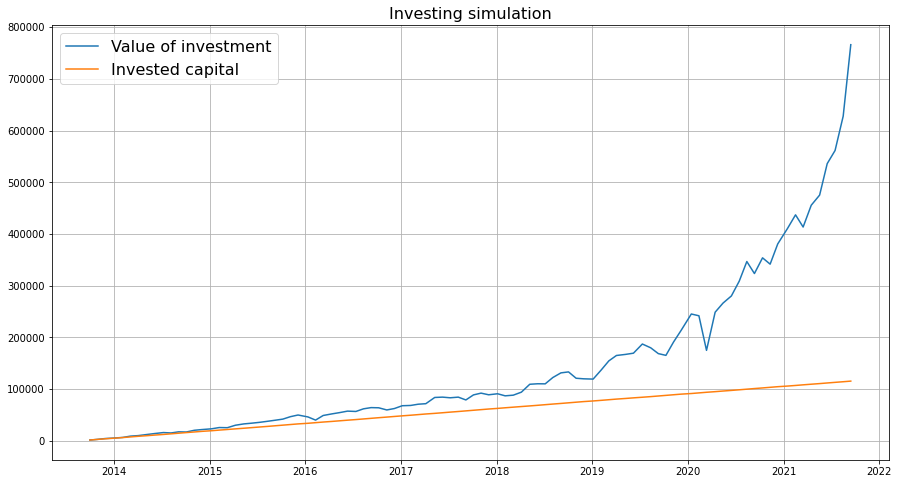

In [222]:
Investing_sum = 1200 # The sum that is invested at every point during the interval
num_times = 21 # The purchase frequency

num_shares = Investing_sum/SP500['Close'][::num_times] # The number of shares that are bought at each point in time

num_shares_list = []
compounded_shares_list = []

for i in range(len(num_shares)): # The purchased shares are first appended into a list with the same length as the amount of times the purchases have been made.
                                 # The purchased shares are then compounded according to the following pattern: 
                                 # (purchase 1) + (purchase1 + purchase 2) + (purchase 1 + purchase 2 + purchase 3) etc... 
                                 # until the entire investment period is represented in a list with all shares bought at each point in time.
    num_shares_list.append(num_shares[i])
    compounded_shares_list.append(sum(num_shares_list))

investment_value_list = [] # When we know how many shares are bought at each point, a new list that displays the value of the investment can be made by multiplying each value in the compounded shares list with the corresponding price per share at that point in time.
for x, y in zip(compounded_shares_list, SP500['Close'][::num_times]):
    investment_value_list.append(x * y)
Invested_capital_list = []
Invested_capital = []

for i in range(len(SP500['Close'][::num_times])): # In order to display the total amount of capital invested, a simple formula is applied, which is:
                                                  # The total amount of purchases multiplied by the sum that's invested every time.
    Invested_capital_list.append(i)
    Invested_capital.append(len(Invested_capital_list)*Investing_sum)
    
print("The total amount of capital invested is:" + str((Invested_capital[-1])) + "$")
print("The final value of our investment is: "+ str(round(investment_value_list[-1])) + "$")
print("The return on invested capital is: " + str(round(investment_value_list[-1]/Invested_capital[-1],2)*100-100) + "%")

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain')
plt.plot(SP500['Close'][::num_times].index,investment_value_list)
plt.plot(SP500['Close'][::num_times].index,Invested_capital)
plt.grid()
plt.title("Investing simulation",fontsize=16)
plt.legend(['Value of investment','Invested capital'],fontsize=16)



## 